# Reading dataset and feature elimination

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.5.0


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn import metrics
from tensorflow import keras
from sklearn.metrics import confusion_matrix

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
project_path = '/content/drive/My Drive/Colab Notebooks/'
dataset_file = project_path + 'bank.csv'

In [ ]:
data = pd.read_csv(dataset_file)

In [ ]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


In [ ]:
data.drop(labels=['RowNumber','CustomerId','Surname'],axis=1,inplace=True)

In [ ]:
data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


# Perform an EDA on the data

## Bivariate analysis

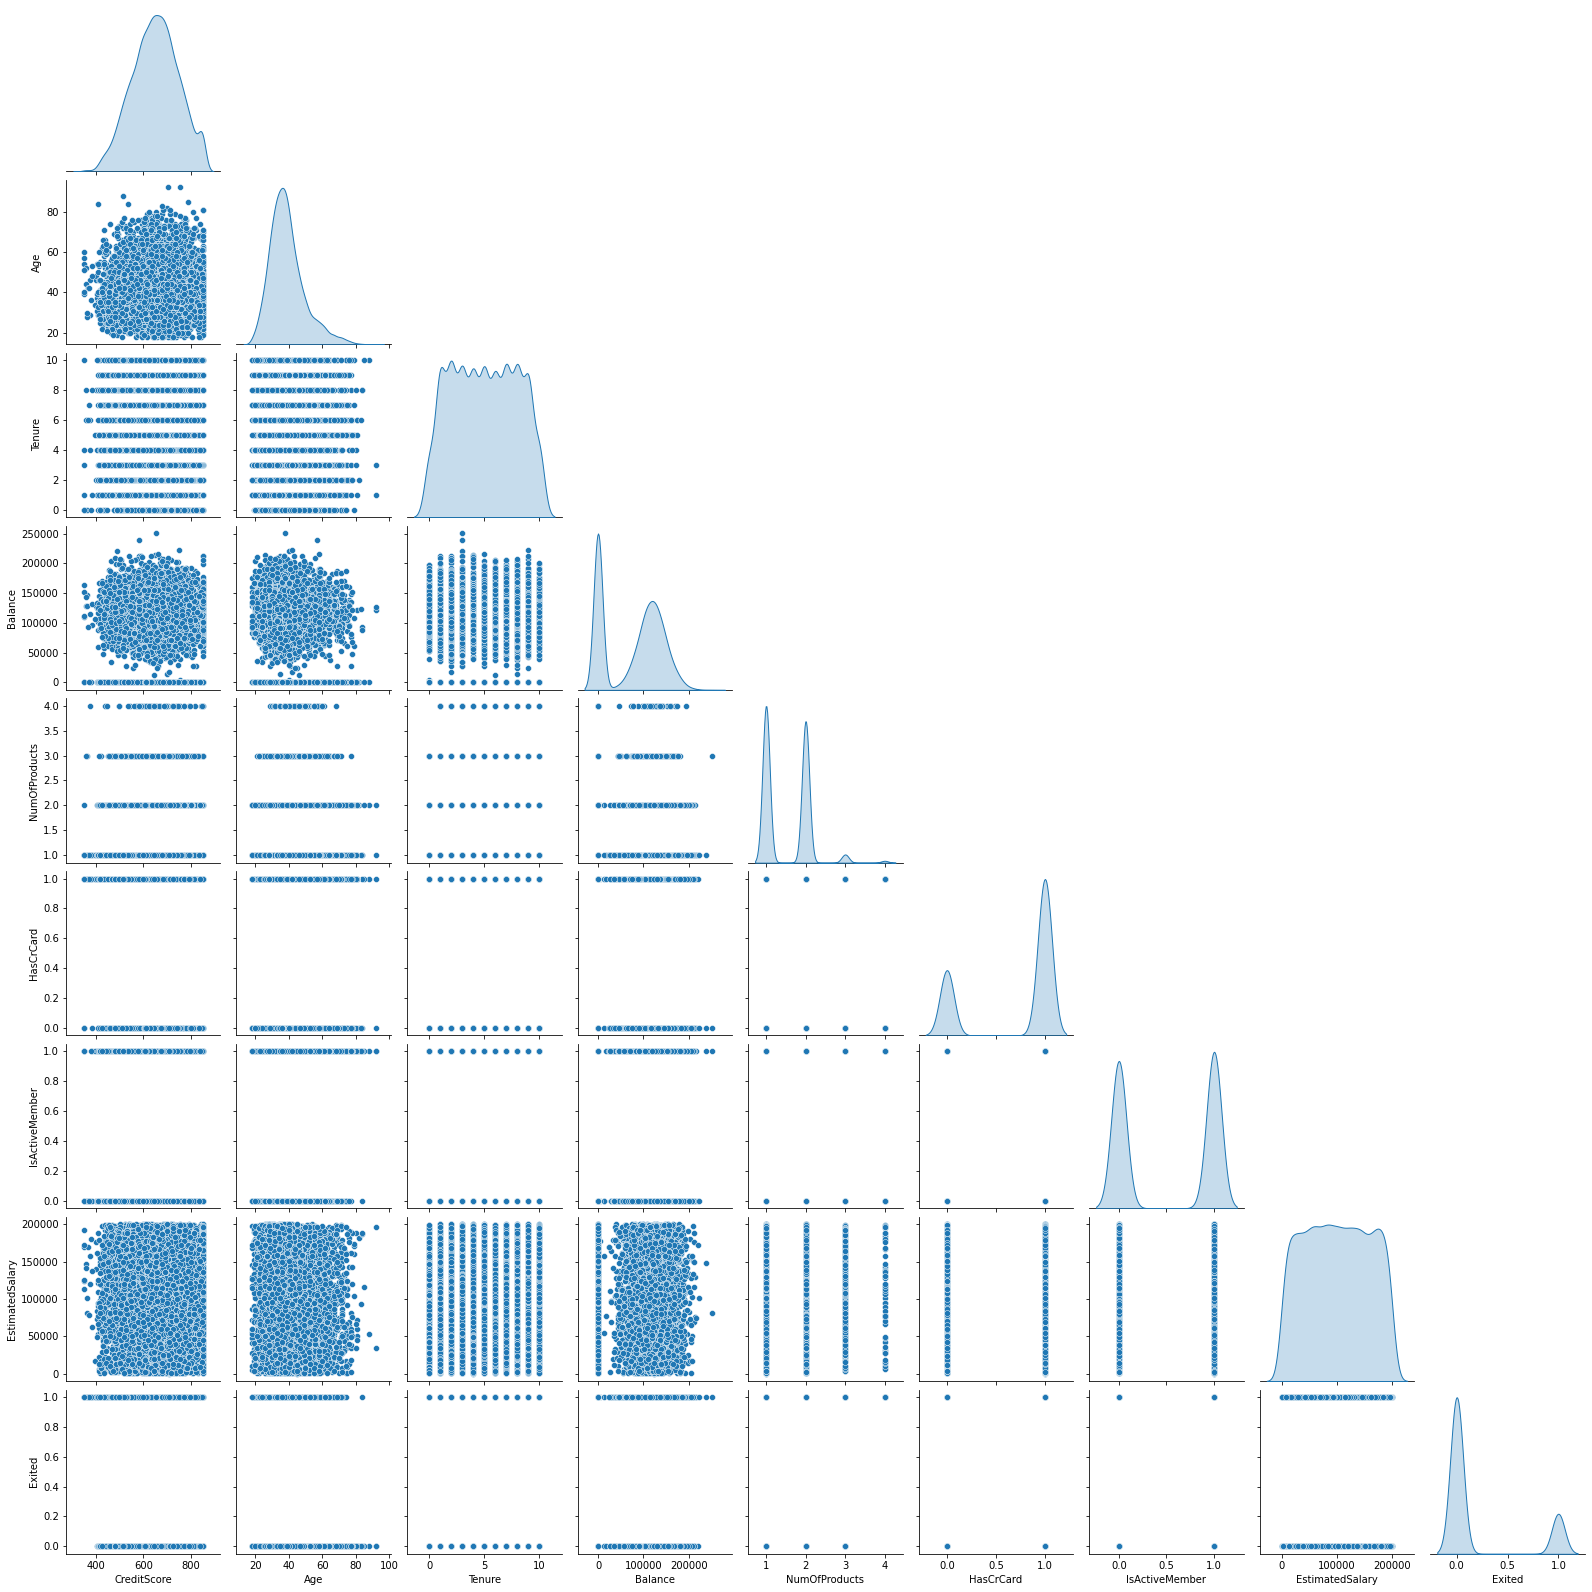

In [ ]:
sns.pairplot(data,corner=True,diag_kind='kde')

# Exploratory deep dive

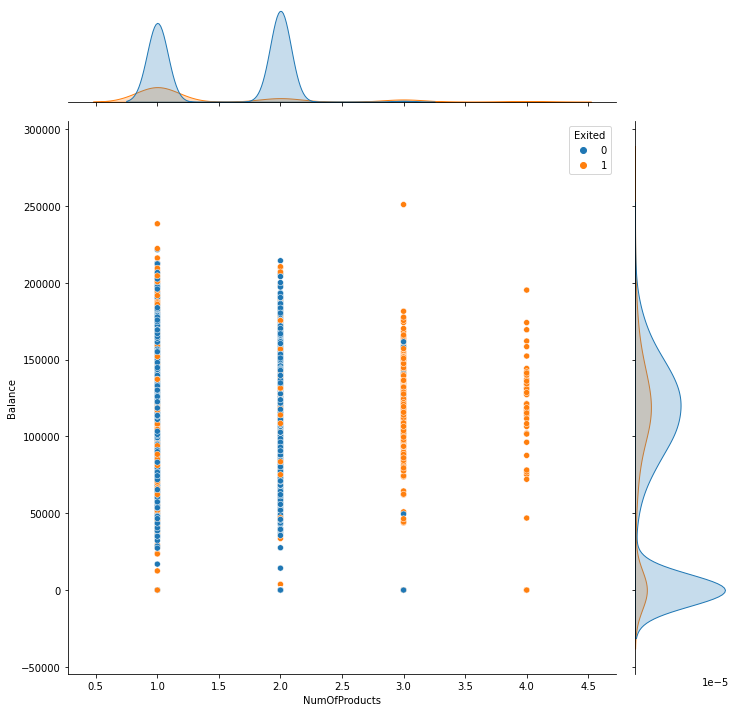

In [ ]:
sns.jointplot(data=data, x='NumOfProducts', y='Balance', hue='Exited', height=10)

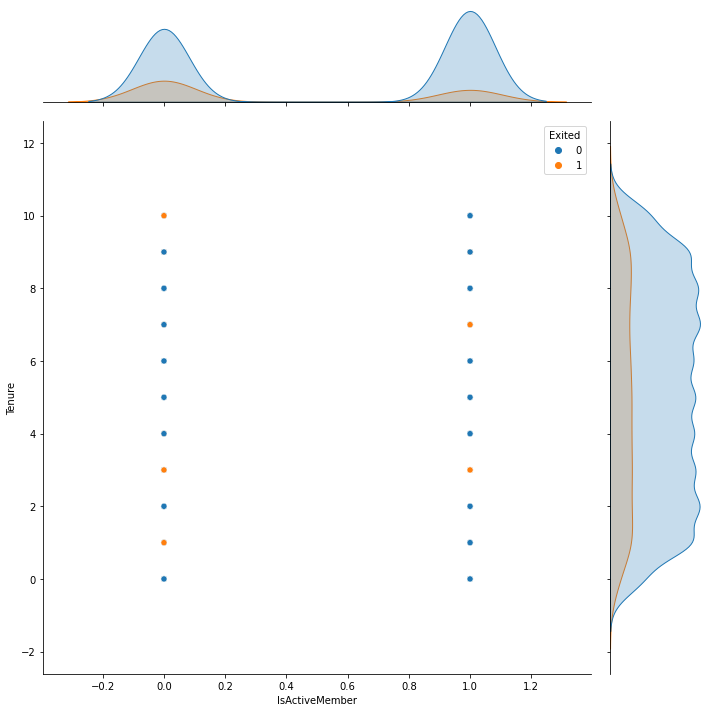

In [ ]:
sns.jointplot(data=data, x='IsActiveMember', y='Tenure', hue='Exited', height=10)

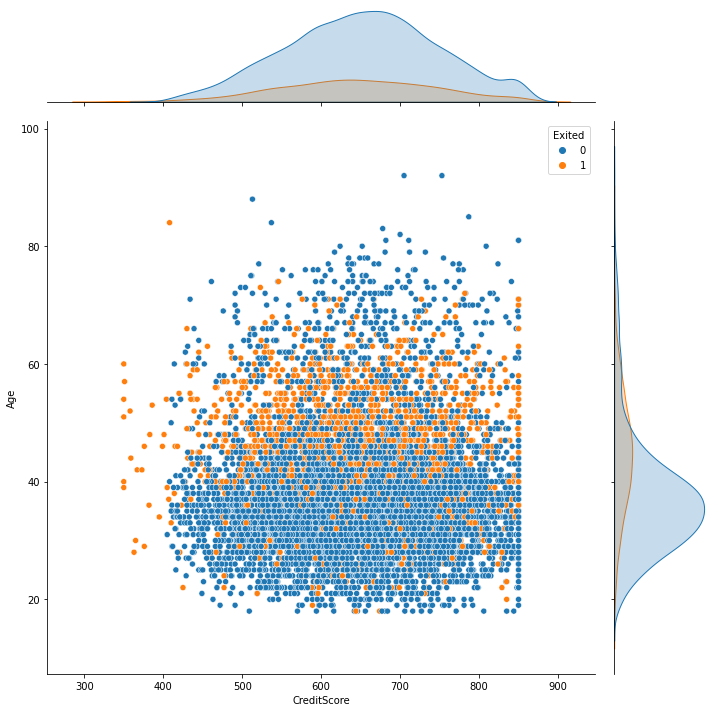

In [ ]:
sns.jointplot(data=data, x='CreditScore', y='Age', hue='Exited', height=10)

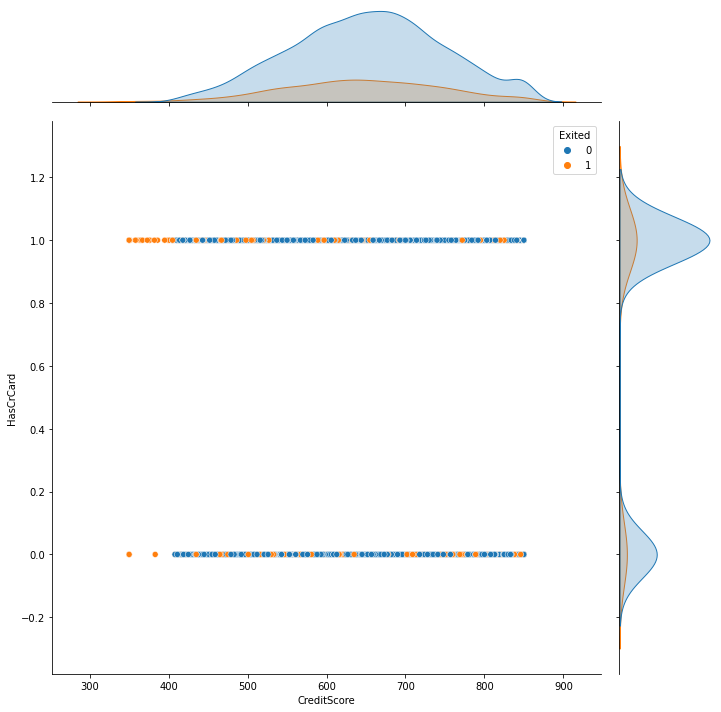

In [ ]:
sns.jointplot(data=data, x='CreditScore', y='HasCrCard', hue='Exited', height=10)

## Customer profiles

*   Many people with no balance but active account
*   Most active users around the age of 38
*   Everyone with low credit score leaves the bank
*   Around age 52, more people churn than not
*   Everyone with 4 products churn
*   Most people with 3 products churn

# Illustrate insights based on EDA



*   Many people with no balance but active account
*   Most active users around the age of 38
*   Everyone with low credit score leaves the bank
*   Around age 52, more people churn than not
*   Everyone with 4 products churn
*   Most people with 3 products churn









# Data preprocessing

In [ ]:
data = pd.get_dummies(data)

In [ ]:
for i in ['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']:
  data[i] = StandardScaler().fit_transform(data[i].values.reshape(-1,1))

In [ ]:
data

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,-0.326221,0.293517,-1.041760,-1.225848,-0.911583,1,1,0.021886,1,1,0,0,1,0
1,-0.440036,0.198164,-1.387538,0.117350,-0.911583,0,1,0.216534,0,0,0,1,1,0
2,-1.536794,0.293517,1.032908,1.333053,2.527057,1,0,0.240687,1,1,0,0,1,0
3,0.501521,0.007457,-1.387538,-1.225848,0.807737,0,0,-0.108918,0,1,0,0,1,0
4,2.063884,0.388871,-1.041760,0.785728,-0.911583,1,1,-0.365276,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.246488,0.007457,-0.004426,-1.225848,0.807737,1,0,-0.066419,0,1,0,0,0,1
9996,-1.391939,-0.373958,1.724464,-0.306379,-0.911583,1,1,0.027988,0,1,0,0,0,1
9997,0.604988,-0.278604,0.687130,-1.225848,-0.911583,0,1,-1.008643,1,1,0,0,1,0
9998,1.256835,0.293517,-0.695982,-0.022608,0.807737,1,0,-0.125231,1,0,1,0,0,1


In [ ]:
y_data = data['Exited']
X_data = data.drop(axis=1,columns='Exited')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size = 0.2, random_state = 42)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8000, 13)
(2000, 13)
(8000,)
(2000,)


# Build neural network

In [ ]:
model = Sequential()

In [ ]:
model.add(Dense(13, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics='accuracy')

In [ ]:
model.fit(X_train, y_train, epochs=10, batch_size=20, validation_split=0.2, verbose=1)

Epoch 1/10
320/320 [==============================] - 1s 3ms/step - loss: 0.4518 - accuracy: 0.8027 - val_loss: 0.4039 - val_accuracy: 0.8331
Epoch 2/10
320/320 [==============================] - 1s 2ms/step - loss: 0.3836 - accuracy: 0.8384 - val_loss: 0.3720 - val_accuracy: 0.8350
Epoch 3/10
320/320 [==============================] - 1s 3ms/step - loss: 0.3593 - accuracy: 0.8491 - val_loss: 0.3623 - val_accuracy: 0.8394
Epoch 4/10
320/320 [==============================] - 1s 2ms/step - loss: 0.3484 - accuracy: 0.8573 - val_loss: 0.3606 - val_accuracy: 0.8438
Epoch 5/10
320/320 [==============================] - 1s 2ms/step - loss: 0.3432 - accuracy: 0.8608 - val_loss: 0.3526 - val_accuracy: 0.8562
Epoch 6/10
320/320 [==============================] - 1s 3ms/step - loss: 0.3372 - accuracy: 0.8627 - val_loss: 0.3493 - val_accuracy: 0.8519
Epoch 7/10
320/320 [==============================] - 1s 2ms/step - loss: 0.3339 - accuracy: 0.8642 - val_loss: 0.3489 - val_accuracy: 0.8456
Epoch 

# Model performance improvement

## Comment on which metric is best for evaluation.

Recall is the chosen metric of evaluation, as the minimisation of false negatives takes priority in this case.
The bank would prefer not to lose existing customers.
The presence of false positives does not affect the bank's revenue generation as much as false negatives.
Hence, recall is preferred over precision.

In [ ]:
loss, acc = model.evaluate(X_test, y_test)
print('Accuracy: %.3f' % acc)
print('Loss: %.3f' % loss)

63/63 [==============================] - 0s 2ms/step - loss: 0.3416 - accuracy: 0.8580
Accuracy: 0.858
Loss: 0.342


In [ ]:
y_pred = model.predict(X_test)

In [ ]:
for i in range(len(y_test)):
    if y_pred[i]>0.5:
        y_pred[i]=1 
    else:
        y_pred[i]=0

In [ ]:
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)

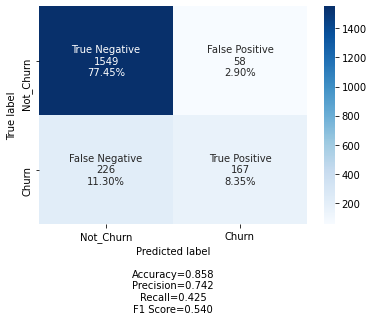

In [ ]:
cm1=confusion_matrix(y_test, y_pred)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not_Churn','Churn']
make_confusion_matrix(cm1, 
                      group_names=labels,
                      categories=categories)


In [ ]:
recall1 = metrics.recall_score(y_test, y_pred)
precision1 = metrics.precision_score(y_test, y_pred)
print('Testing: ')
print('Recall: %.2f' % recall)
print('Precision: %.2f' % precision)

Testing: 
Recall: 0.47
Precision: 0.80


In [ ]:
y_pred = model.predict(X_train)
for i in range(len(y_train)):
    if y_pred[i]>0.5:
        y_pred[i]=1 
    else:
        y_pred[i]=0

print('Training:')
recall = metrics.recall_score(y_train, y_pred)
precision = metrics.precision_score(y_train, y_pred)
print('Recall: %.2f' % recall)
print('Precision: %.2f' % precision)

Training:
Recall: 0.47
Precision: 0.80




*   Clearly, the model is not overfitting the data
*   However, recall score is low and needs improvement
*   This is done by:
            1.   Weighted loss
            2.   Weight initialization







## Weighted Loss

In [ ]:

from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight('balanced', np.unique(y_train), np.array([y_train.iloc[i] for i in range(len(y_train))]))
class_weights = dict(enumerate(class_weights))
class_weights

{0: 0.6293266205160478, 1: 2.4330900243309004}

In [ ]:
model2 = Sequential()

In [ ]:
model2.add(Dense(13, activation='relu'))
model2.add(Dense(50, activation='relu'))
model.add(Dense(100, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))

In [ ]:
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics='accuracy')

In [ ]:
model2.fit(X_train,y_train,batch_size=5,epochs=10, class_weight=class_weights, shuffle=True)

Epoch 1/10
1600/1600 [==============================] - 3s 2ms/step - loss: 0.5639 - accuracy: 0.7230
Epoch 2/10
1600/1600 [==============================] - 3s 2ms/step - loss: 0.4878 - accuracy: 0.7763
Epoch 3/10
1600/1600 [==============================] - 3s 2ms/step - loss: 0.4705 - accuracy: 0.7799
Epoch 4/10
1600/1600 [==============================] - 3s 2ms/step - loss: 0.4632 - accuracy: 0.7854
Epoch 5/10
1600/1600 [==============================] - 3s 2ms/step - loss: 0.4626 - accuracy: 0.7897
Epoch 6/10
1600/1600 [==============================] - 3s 2ms/step - loss: 0.4575 - accuracy: 0.7925
Epoch 7/10
1600/1600 [==============================] - 3s 2ms/step - loss: 0.4555 - accuracy: 0.7926
Epoch 8/10
1600/1600 [==============================] - 3s 2ms/step - loss: 0.4526 - accuracy: 0.7974
Epoch 9/10
1600/1600 [==============================] - 3s 2ms/step - loss: 0.4504 - accuracy: 0.7976
Epoch 10/10
1600/1600 [==============================] - 3s 2ms/step - loss: 0.449

In [ ]:
y_pred2 = model2.predict(X_test)

In [ ]:
for i in range(len(y_test)):
    if y_pred2[i]>0.5:
        y_pred2[i]=1 
    else:
        y_pred2[i]=0

In [ ]:
recall2 = metrics.recall_score(y_test, y_pred2)
precision2 = metrics.precision_score(y_test, y_pred2)
print('Recall: %.2f' % recall2)
print('Precision: %.2f' % precision2)

Recall: 0.77
Precision: 0.48


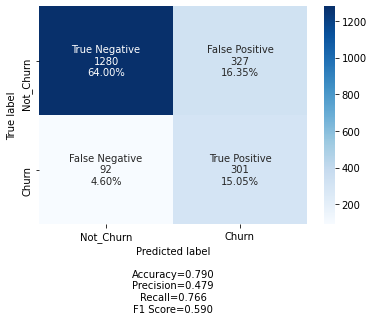

In [ ]:
cm2=confusion_matrix(y_test, y_pred2)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not_Churn','Churn']
make_confusion_matrix(cm2, 
                      group_names=labels,
                      categories=categories)

## Weight Initialization

In [ ]:

es= keras.callbacks.EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=15,
 
                             verbose=0, mode='min', restore_best_weights= True)
Model2 = Sequential()

Model2.add(Dense(13, kernel_initializer='he_normal', activation='relu'))
Model2.add(Dense(50, kernel_initializer='he_normal', activation='relu'))
Model2.add(Dense(1, kernel_initializer='he_normal', activation='sigmoid'))

Model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    
his_mod2= Model2.fit(X_train, y_train, validation_split=0.2, batch_size=25, epochs=10, callbacks=[es], shuffle=True, verbose=1)



Epoch 1/10
256/256 [==============================] - 1s 2ms/step - loss: 0.4967 - accuracy: 0.7784 - val_loss: 0.4346 - val_accuracy: 0.8112
Epoch 2/10
256/256 [==============================] - 0s 2ms/step - loss: 0.4405 - accuracy: 0.8019 - val_loss: 0.4165 - val_accuracy: 0.8250
Epoch 3/10
256/256 [==============================] - 1s 2ms/step - loss: 0.4233 - accuracy: 0.8100 - val_loss: 0.4013 - val_accuracy: 0.8306
Epoch 4/10
256/256 [==============================] - 1s 2ms/step - loss: 0.4031 - accuracy: 0.8220 - val_loss: 0.3841 - val_accuracy: 0.8381
Epoch 5/10
256/256 [==============================] - 1s 2ms/step - loss: 0.3821 - accuracy: 0.8388 - val_loss: 0.3702 - val_accuracy: 0.8425
Epoch 6/10
256/256 [==============================] - 1s 2ms/step - loss: 0.3666 - accuracy: 0.8439 - val_loss: 0.3629 - val_accuracy: 0.8494
Epoch 7/10
256/256 [==============================] - 1s 2ms/step - loss: 0.3583 - accuracy: 0.8492 - val_loss: 0.3566 - val_accuracy: 0.8506
Epoch 

In [ ]:
y_pred3 = Model2.predict(X_test)

In [ ]:
for i in range(len(y_test)):
    if y_pred3[i]>0.5:
        y_pred3[i]=1 
    else:
        y_pred3[i]=0

In [ ]:
recall3 = metrics.recall_score(y_test, y_pred3)
precision3 = metrics.precision_score(y_test, y_pred3)
print('Recall: %.2f' % recall3)
print('Precision: %.2f' % precision3)

Recall: 0.46
Precision: 0.66


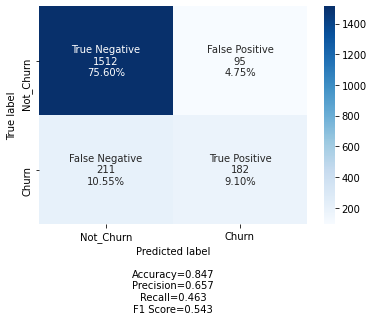

In [ ]:
cm3=confusion_matrix(y_test, y_pred3)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not_Churn','Churn']
make_confusion_matrix(cm3, 
                      group_names=labels,
                      categories=categories)

# Model performance evaluation

In [ ]:
pd.DataFrame({'Basic NN' : [recall1, precision1],
              'Weighted loss' : [recall2, precision2],
              'Weight initialization' : [recall3, precision3]}, index=['Recall','Precision'])

,Basic NN,Weighted loss,Weight initialization
Recall,0.424936,0.765903,0.463104
Precision,0.742222,0.479299,0.657040


Clearly, Weighted loss model is the best to use as it offer highest test recall out of all the three models.

# Conclusion and key takeaways



*   A neural network model which predicts whether customers will churn from a bank has been successfully built.

*   The model aims to maximise recall, however false positives are also present.

*   While the recall score is not very high at the moment (~77%), the model will continue to learn with successive iterations.

*   The model is not overfitting to the training data, which means it is unbiased and should perform relatively well on new data.





In [ ]:
%%shell
jupyter nbconvert --to html /content/Bank_Churn_Prediction_Neural_Networks.ipynb

[NbConvertApp] Converting notebook /content/Bank_Churn_Prediction_Neural_Networks.ipynb to html
[NbConvertApp] Writing 1447817 bytes to /content/Bank_Churn_Prediction_Neural_Networks.html
